<a href="https://colab.research.google.com/github/anirudh14397/Aerofit_Business_Case/blob/main/Aerofit_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the csv file
df=pd.read_csv("/content/drive/MyDrive/Datasets/aerofit_treadmill.csv")

In [ ]:
#shape- in order to get no. of rows and columns
df.shape

(180, 9)

180 rows and 9 columns

In [ ]:
df.info() # for checking the data type of various columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe(include="all") # statistical summary of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


- There are no missing values
- We have 3 unique products
- KP281 is the most popular product
- Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
- 75% of persons are having education <= 16 years.
- 104's gender is Male and rest are the female.
- Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

In [ ]:
#checking the unique products
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

# **Univariate Analysis**

Understanding Distribution of following quantative attributes



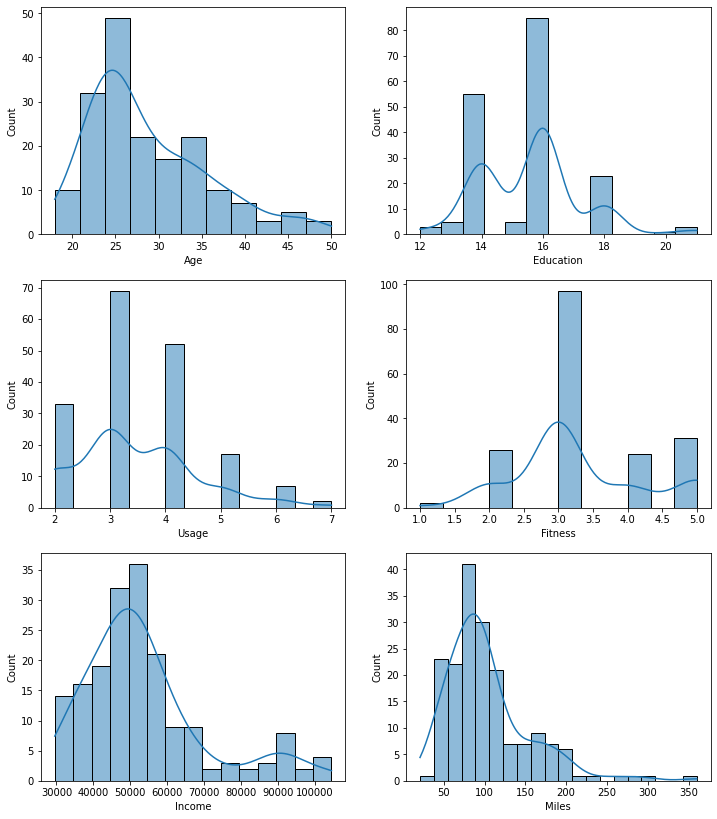

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))# creating subplots 
fig.subplots_adjust(top=1.2) # adjusting the position of top edge of subplots

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

Outlier detection with boxplots

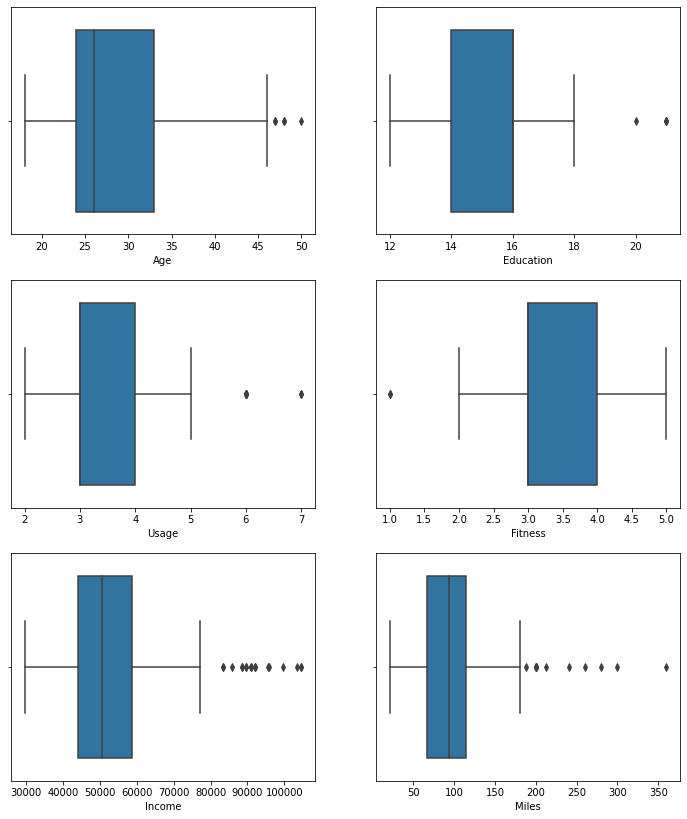

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0]) # orient=h (horizontal box plots)
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

As we can see that from the plot itself that Income and Miles have more outliers as compared to others 

 Distribution of the data for the qualitative attributes

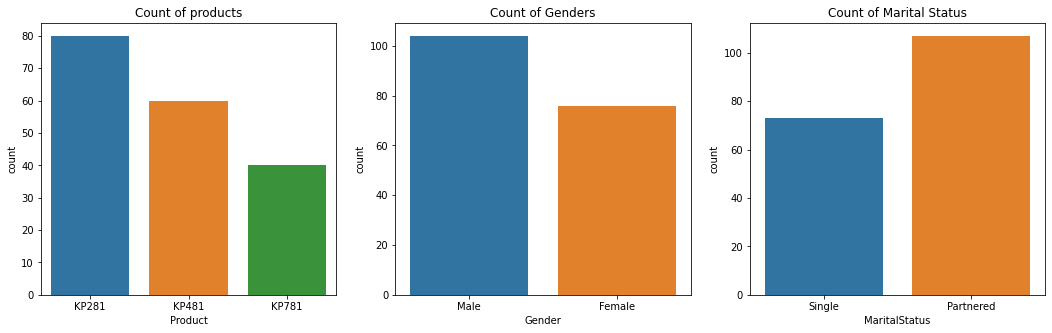

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Count of products")
axs[1].set_title("Count of Genders")
axs[2].set_title("Count of Marital Status")
plt.show()

- KP281 is the most frequent product.
- Thare are more Males in the data than Females.
- More Partnered persons are there in the data.

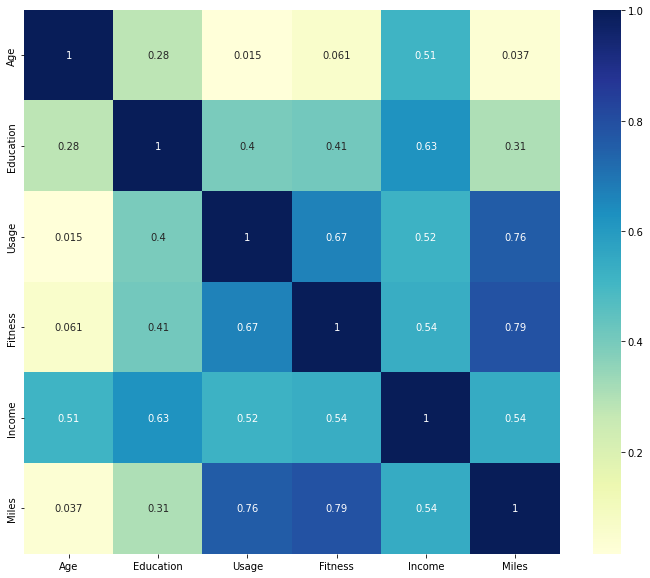

In [ ]:
plt.figure(figsize=(12,10))
#tree map for correlations
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Usage and Fitness is directly propotional to the Miles covered

<Figure size 864x720 with 0 Axes>

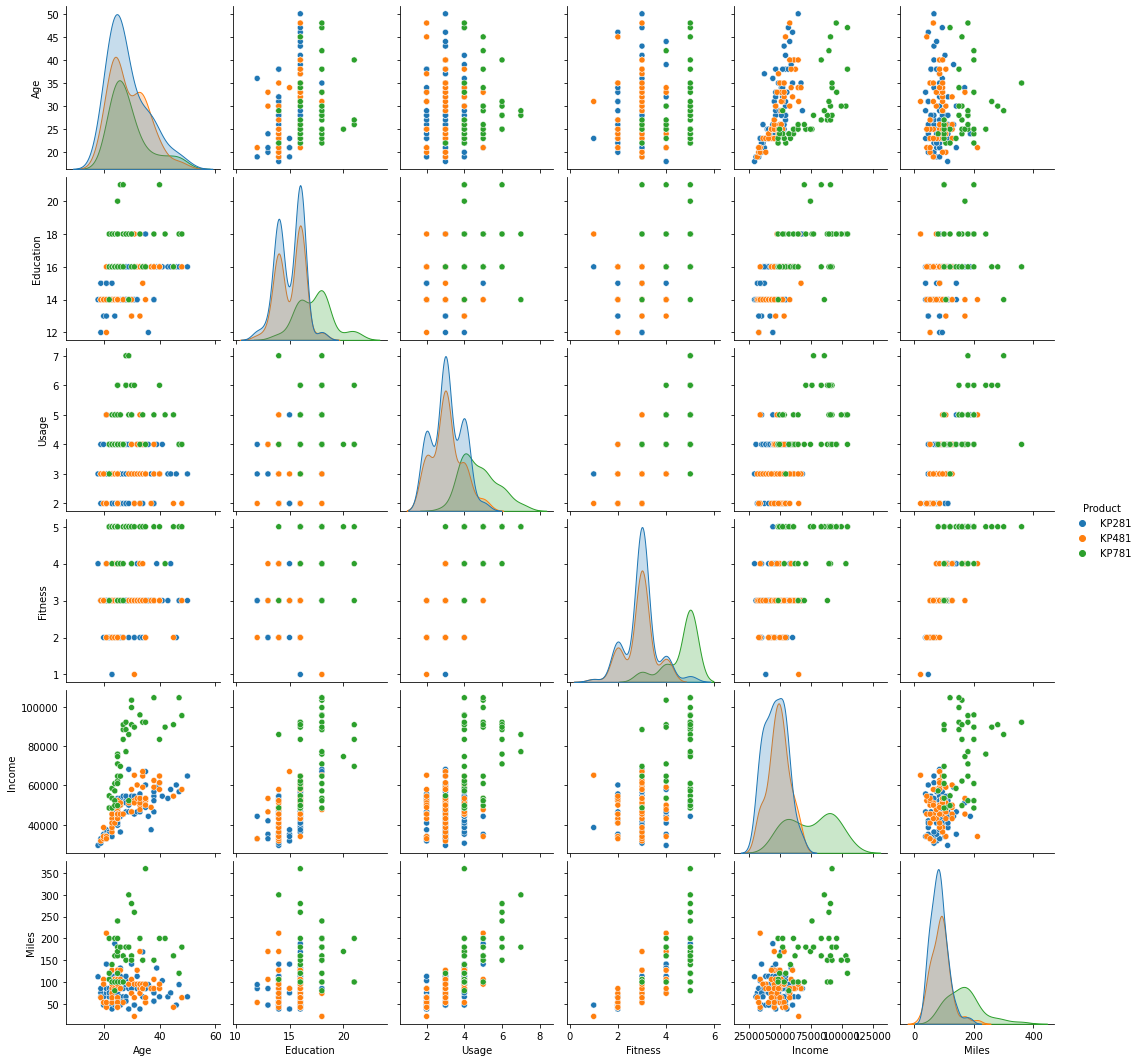

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(df, hue ='Product')

In [ ]:
#normalised count
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

**Product**
  - 44.44% of the customers have purchased KP2821 product.
  - 33.33% of the customers have purchased KP481 product.
  - 22.22% of the customers have purchased KP781 product.


**Gender**
  - 57.78% of the customers are Male.


**Marital Status**
  - 59.44% of the customers are Partnered.

# **Bivariate Analysis**

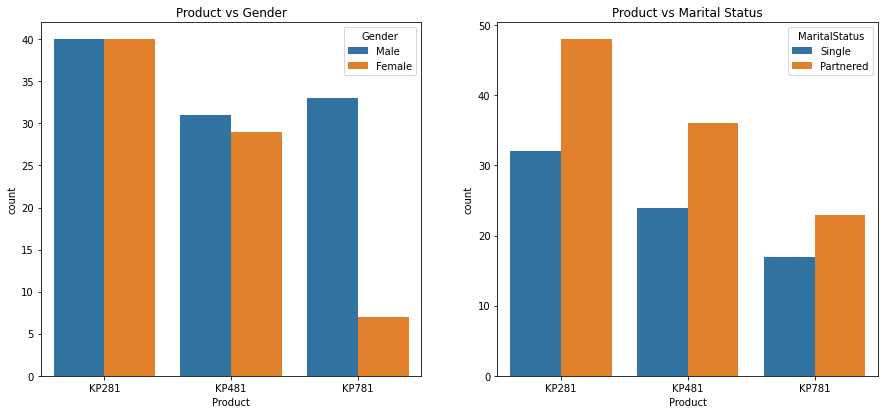

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', ax=axs[1])
axs[0].set_title("Product vs Gender")
axs[1].set_title("Product vs Marital Status")
plt.show()

**Product vs Gender**
- Equal number of males and females have purchased KP281 product
- Most of the Male customers have purchased the KP781 product

**Product vs Marital Status**
- Customer who is Partnered, is more likely to purchase the product

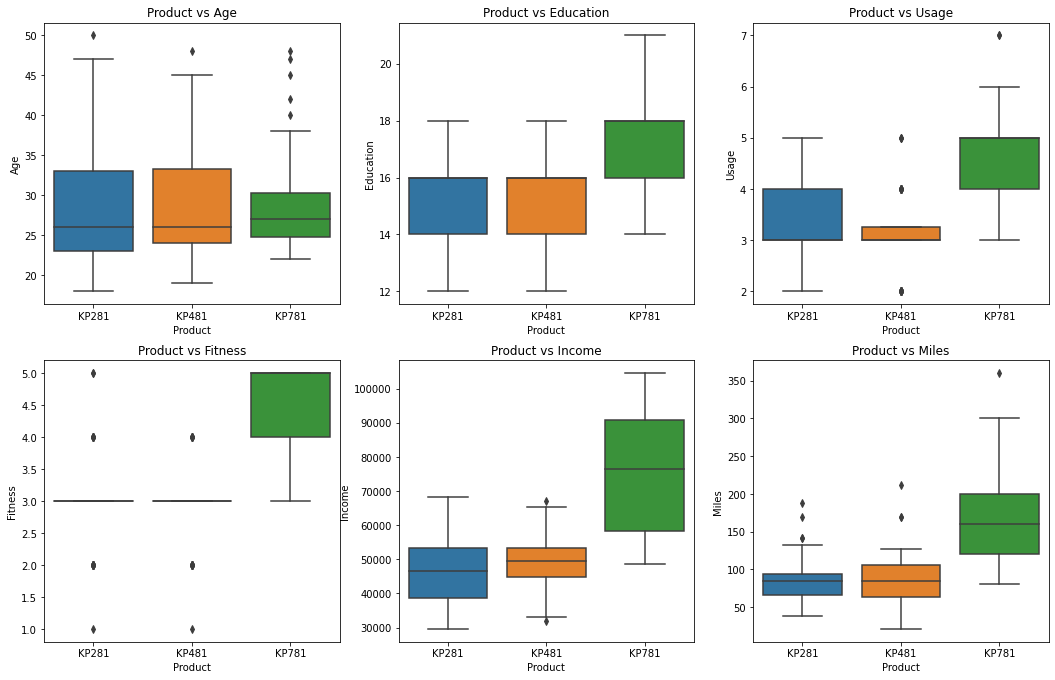

In [ ]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}")
        count += 1

**Product vs Age**
- Customers purchasing products KP281 & KP481 are having same Age median value
- Customers whose age lies between 25-30, are more likely to buy KP781 product

**Product vs Education**
- Customers whose Education is greater than 16, have more chances to purchase the KP781 product
- While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481

**Product vs Usage**
- Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product
- While the other customers are likely to purchasing KP281 or KP481

**Product vs Fitness**
- The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product

**Product vs Income**
- Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product

**Product vs Miles**
- If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product

# **Multivariate Analysis**

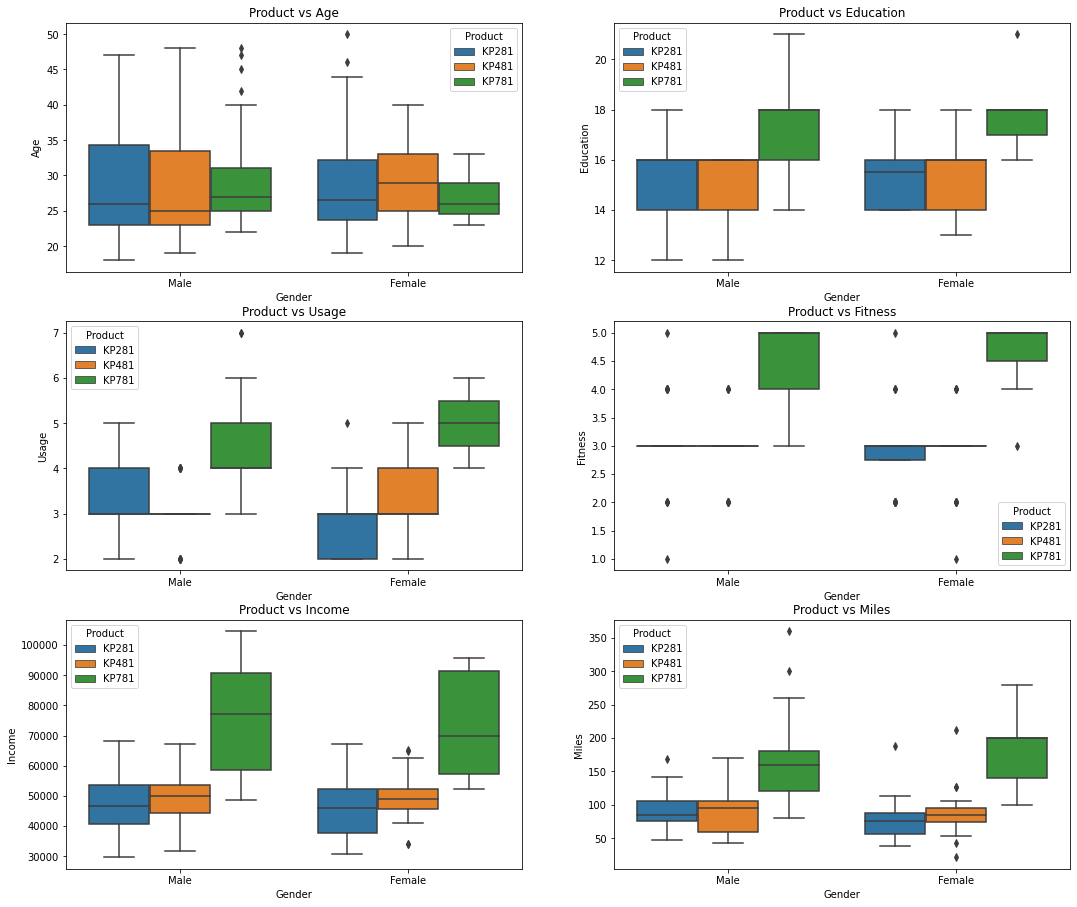

In [ ]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}" )
        count += 1

Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product

# **Marginal Probability**

In [ ]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

# **Conditional Probabilities**

In [ ]:
pd.crosstab(df['Gender'],[df['Product']], normalize=True, margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,0.22,0.16,0.04,0.42
Male,0.22,0.17,0.18,0.58
Total,0.44,0.33,0.22,1.00


- P(Male): 0.58
- P(Female): 0.42

- P(KP781/Male): 0.32 = (0.18/0.58)
- P(KP481/Male): 0.30 = (0.17/0.58)
- P(KP281/Male): 0.38 =  (0.22/0.58)

- P(KP781/Female): 0.09 =  (0.04/0.42)
- P(KP481/Female): 0.38 =  (0.16/0.42)
- P(KP281/Female): 0.53 =  (0.22/0.42)

In [ ]:
pd.crosstab(df['MaritalStatus'],[df['Product']], normalize=True, margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,0.27,0.20,0.13,0.59
Single,0.18,0.13,0.09,0.41
Total,0.44,0.33,0.22,1.00


- P(Single): 0.41
- P(Partnered): 0.59

- P(KP781/Single): 0.23 = (0.09/0.41)
- P(KP481/Single): 0.33 = (0.13/0.41)
- P(KP281/Single): 0.44 = (0.18/0.41)

- P(KP781/Partnered): 0.21 = (0.13/0.59)
- P(KP481/Partnered): 0.34 = (0.20/0.59)
- P(KP281/Partnered): 0.45 = (0.27/0.59)


In [ ]:
pd.crosstab(df['Fitness'],[df['Product']], normalize=True, margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781,Total
Fitness,,,,
1,0.01,0.01,0.00,0.01
2,0.08,0.07,0.00,0.14
3,0.30,0.22,0.02,0.54
4,0.05,0.04,0.04,0.13
5,0.01,0.00,0.16,0.17
Total,0.44,0.33,0.22,1.00


In [ ]:
pd.crosstab(df['Education'],[df['Product']], normalize=True, margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781,Total
Education,,,,
12,0.01,0.01,0.00,0.02
13,0.02,0.01,0.00,0.03
14,0.17,0.13,0.01,0.31
15,0.02,0.01,0.00,0.03
16,0.22,0.17,0.08,0.47
18,0.01,0.01,0.11,0.13
20,0.00,0.00,0.01,0.01
21,0.00,0.00,0.02,0.02
Total,0.44,0.33,0.22,1.00
